### Submitted by Kumar Apurva 2K18/MC/058 and Madhuresh Mayank 2K18/MC/062

# AROON (AR) Indicator programming

In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 1. Data reading from file

In [2]:
DATA_FILE_PATH = "apple.csv"
df = pd.read_csv(DATA_FILE_PATH, sep=',')
TIMESTAMP_NAME = "Date" # timestamp name from .csv
PRICE_NAME = "Close" # define price name that will be used from .csv

## 2. Calculating AROON indicator

In [3]:
# How to understand this indicator
# If the Aroon-Up crosses above the Aroon-Down, then a new uptrend may start soon. Conversely,
# if Aroon-Down crosses above the Aroon-Up, then a new downtrend may start soon.
#
# When Aroon-Up reaches 100, a new uptrend may have begun. If it remains persistently
# between 70 and 100, and the Aroon-Down remains between 0 and 30, then a new uptrend is underway.


aroon_length = 25
aroon_up = []
aroon_down = []

highest = 0 # starting values
lowest = sys.maxsize # maximum size for float

lengh_since_last_high = 0
lengh_since_last_low = 0

period_values = [None] * aroon_length


itterator = 0
for i in df[PRICE_NAME]:
    #find highest and lowest values in a aroon period
    if itterator > 0: # ignore the very first itteration when 'period_values' consist of 'None' only
        highest = max(x for x in period_values if x is not None) # ignoring 'None'
        lowest = min(x for x in period_values if x is not None) # ignoring 'None'
        lengh_since_last_high = aroon_length - period_values.index(highest)
        lengh_since_last_low = aroon_length - period_values.index(lowest)

    if (i > highest): # new highest value
        highest = i
        aroon_up.append(100)
    elif (i < highest):
        high_value = ((aroon_length - lengh_since_last_high) / aroon_length) * 100
        aroon_up.append(high_value)

    if (i < lowest): # new lowest value
        lowest = i
        aroon_down.append(100)
    elif (i > lowest):
        low_value = ((aroon_length - lengh_since_last_low) / aroon_length) * 100
        aroon_down.append(low_value)

    period_values.append(i)
    period_values.pop(0)
    itterator += 1



## 3. Show historic price data in first subplot and AROON on other

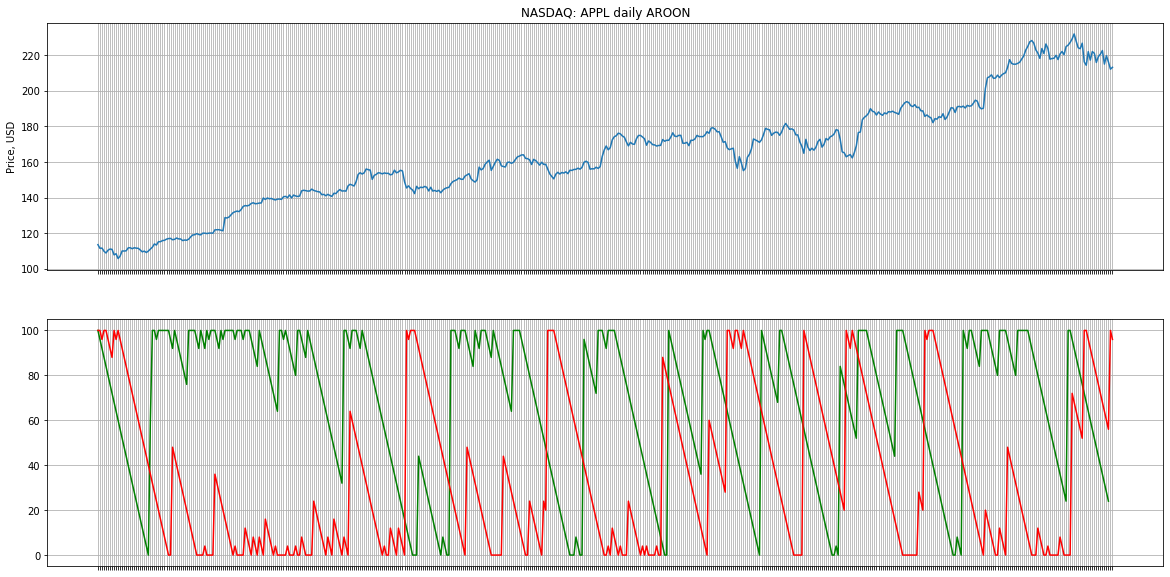

In [4]:
plt.figure(figsize=(20, 10)) # change default figure size
ax1 = plt.subplot(2, 1, 1)
plt.plot(df[TIMESTAMP_NAME], df[PRICE_NAME])
plt.title("NASDAQ: APPL daily AROON")
plt.ylabel("Price, USD")
plt.grid()
frame1 = plt.gca() # hide x axis values
val1=frame1.axes.xaxis.set_ticklabels([])

# add data to subplot
x2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(aroon_up, color = 'green')
plt.plot(aroon_down, color = 'red')
plt.grid()
plt.show()